<a href="https://colab.research.google.com/github/shubham151/AmazonStockAnalytics/blob/main/amazonStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(zoo)
library(tidyverse)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
library(tidyverse)
library(lubridate)

amazon_data <- read_csv("/content/AMZN.csv")

# Convert the Date column to a Date type
amazon_data$Date <- as.Date(amazon_data$Date)

head(amazon_data)


Rows: 6516 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (6): Open, High, Low, Close, Adj Close, Volume
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Open,High,Low,Close,Adj Close,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000


Daily Return

In [3]:
 amazon_data <- amazon_data %>%
  mutate(Daily_Return = (Close - lag(Close)) / lag(Close))

head(amazon_data)


Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,NA
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,-0.11702769
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,-0.01204053
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,-0.04268471
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,-0.12739235
1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,-0.02189085


In [ ]:
amazon_data <- amazon_data %>%
  mutate(MA30 = rollmean(`Adj Close`, 30, fill = NA, align = "right"),
         MA90 = rollmean(`Adj Close`, 90, fill = NA, align = "right"))

Moving Average

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 29 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 89 rows containing missing values (`geom_line()`).”


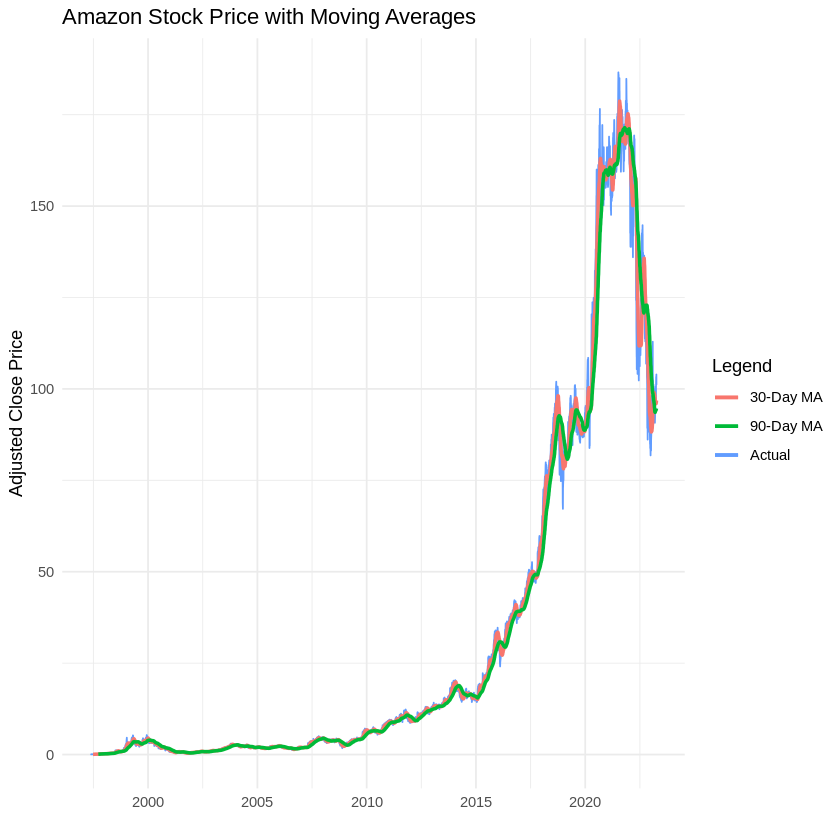

In [10]:
ggplot(amazon_data, aes(x = Date)) +
  geom_line(aes(y = `Adj Close`, colour = "Actual")) +
  geom_line(aes(y = MA30, colour = "30-Day MA"), size = 1) +
  geom_line(aes(y = MA90, colour = "90-Day MA"), size = 1) +
  labs(title = "Amazon Stock Price with Moving Averages",
       x = "",
       y = "Adjusted Close Price",
       colour = "Legend") +
  theme_minimal()


Volume Analysis

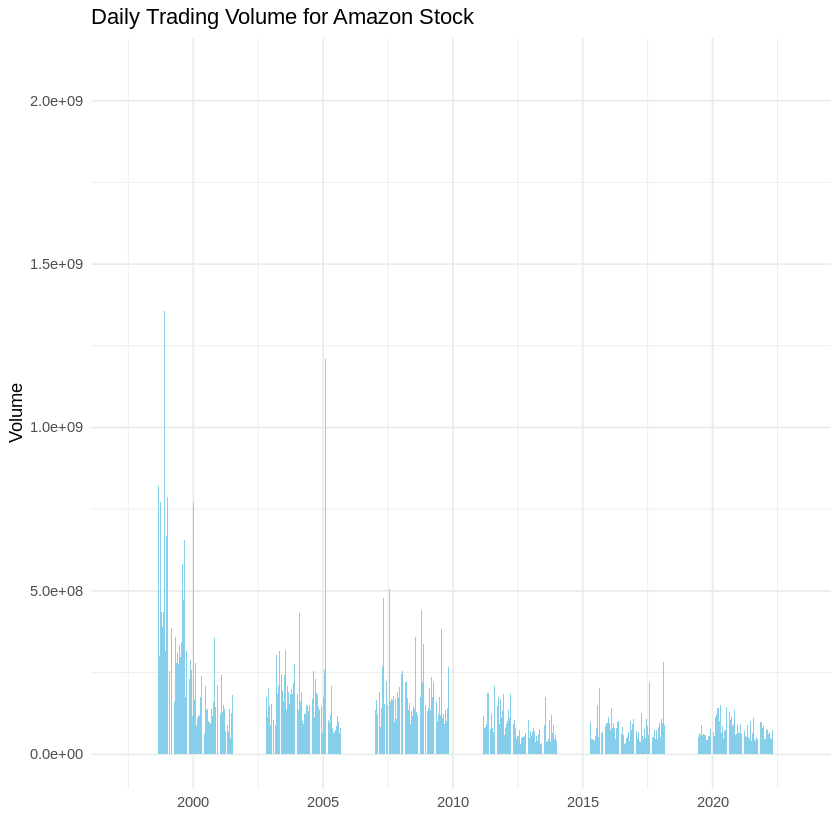

In [11]:
ggplot(amazon_data, aes(x = Date, y = Volume)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Daily Trading Volume for Amazon Stock",
       x = "",
       y = "Volume") +
  theme_minimal()

Calculate and Plot Volatility

Warning message in rollapply.zoo(zoo(data), ...):
“na.pad argument is deprecated”
Warning message:
“Removed 30 rows containing missing values (`geom_line()`).”


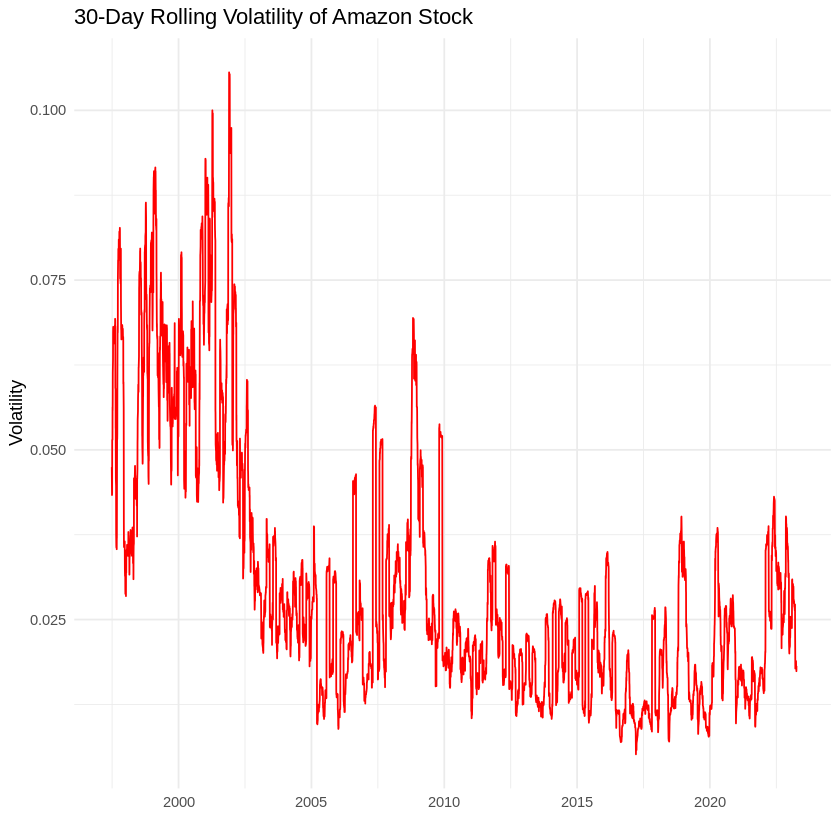

In [12]:
amazon_data$Volatility <- rollapply(amazon_data$Daily_Return, 30, sd, na.pad = TRUE, align = "right")

ggplot(amazon_data, aes(x = Date, y = Volatility)) +
  geom_line(color = "red") +
  labs(title = "30-Day Rolling Volatility of Amazon Stock",
       x = "",
       y = "Volatility") +
  theme_minimal()
